In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

- Data Merging and Feature Engineering
- EDA 
- PCA Segementation
- t-SNE Visualization

In [3]:
# Importing and reading the data

df_eda = pd.read_csv('data/movie_features_eda.csv')
df_ratings = pd.read_csv('data/rating_eda.csv')
df.head(3)

,Unnamed: 0,movieId,title,decade_1890,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
0,0,1,Toy Story (1995),0,0,0,0,0,0,0,...,0.03950,0.01800,0.04575,0.03275,0.1250,0.04150,0.01925,0.03625,0.07775,0.02300
1,1,2,Jumanji (1995),0,0,0,0,0,0,0,...,0.04175,0.01925,0.01725,0.02425,0.1255,0.02250,0.01550,0.01475,0.09025,0.01875
2,2,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,...,0.04150,0.02675,0.02775,0.03425,0.1555,0.03675,0.01700,0.01950,0.09700,0.01850


In [71]:
df.shape

(27278, 1174)

In [4]:
df_eda.head(3)

,movieId,title,genres,decade_1890,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,...,musical,mystery,no_genres,film_noir,romance,scifi,thriller,war,western,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1990


In [72]:
df_eda.shape

(27278, 47)

In [5]:
df_ratings = df_ratings.rename(columns={'Unnamed: 0':'movieId'})
df_ratings.head(3)

,avg_rating,movieId,num_rating
0,3.921240,1,1
1,3.211977,2,2
2,3.151040,3,3


## Data Merging and Feature Engineering

#### Prepare data for EDA

In [6]:
df_eda.head(3)

,movieId,title,genres,decade_1890,decade_1900,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,...,musical,mystery,no_genres,film_noir,romance,scifi,thriller,war,western,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1990


In [7]:
# Checking the columns I want to keep for EDA
df_eda.columns

Index(['movieId', 'title', 'genres', 'decade_1890', 'decade_1900',
       'decade_1910', 'decade_1920', 'decade_1930', 'decade_1940',
       'decade_1950', 'decade_1960', 'decade_1970', 'decade_1980',
       'decade_1990', 'decade_2000', 'decade_2010', '1970', '1990', '1991',
       '1993', '2002', '2003', '2008', '2010', '2011', '2014', 'action',
       'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'horror', 'imax', 'musical', 'mystery', 'no_genres',
       'film_noir', 'romance', 'scifi', 'thriller', 'war', 'western',
       'decade'],
      dtype='object')

In [8]:
# Cleaning up and assigning only necessary colums, others are unnecessary or data errors
df_n = df_eda[['movieId', 'title', 'genres', 'action',
       'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'horror', 'imax', 'musical', 'mystery',
       'no_genres', 'film_noir', 'romance', 'scifi', 'thriller', 'war', 'western',
       'decade']]
df_n.head(2)

,movieId,title,genres,action,adventure,animation,children,comedy,crime,documentary,...,musical,mystery,no_genres,film_noir,romance,scifi,thriller,war,western,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1990


In [9]:
# Write a function to count the number of genres for each movie
def num_genres(genre):
    return len(genre.split('|'))

In [10]:
df_n['num_genres'] = df_n['genres'].map(num_genres)

/Users/dmitriy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_n = pd.merge(df_n, df_ratings, 
                on = 'movieId',
                how = 'left')
df_n.head(3)

,movieId,title,genres,action,adventure,animation,children,comedy,crime,documentary,...,film_noir,romance,scifi,thriller,war,western,decade,num_genres,avg_rating,num_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1990,5,3.921240,1.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1990,3,3.211977,2.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1990,2,3.151040,3.0


In [12]:
df_n.head(3)

,movieId,title,genres,action,adventure,animation,children,comedy,crime,documentary,...,film_noir,romance,scifi,thriller,war,western,decade,num_genres,avg_rating,num_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1990,5,3.921240,1.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1990,3,3.211977,2.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1990,2,3.151040,3.0


In [13]:
df_n.isnull().sum()

movieId          0
title            0
genres           0
action           0
adventure        0
animation        0
children         0
comedy           0
crime            0
documentary      0
drama            0
fantasy          0
horror           0
imax             0
musical          0
mystery          0
no_genres        0
film_noir        0
romance          0
scifi            0
thriller         0
war              0
western          0
decade           0
num_genres       0
avg_rating     534
num_rating     534
dtype: int64

In [14]:
# Since there are no rating for some on the movies I am going to fill them with zero
df_n = df_n.fillna(0)

#### Decade

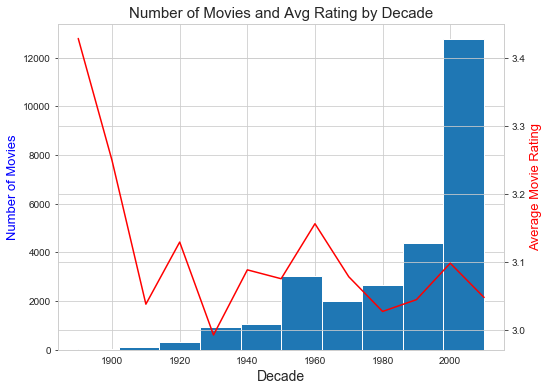

In [23]:
fig, ax1 = plt.subplots(figsize = (8, 6))
ax1.hist(df_n['decade'])
ax1.set_xlabel('Decade', fontsize = 14)
ax1.set_ylabel('Number of Movies', color='b', fontsize = 13)

ax2 = ax1.twinx()
ax2.plot(df_n.groupby('decade').mean()['avg_rating'], 'r')
ax2.set_ylabel('Average Movie Rating', color='r', fontsize = 13)


ax1.set_title('Number of Movies and Avg Rating by Decade', fontsize = 15);

    Majority of our movies were creates in the last decade.

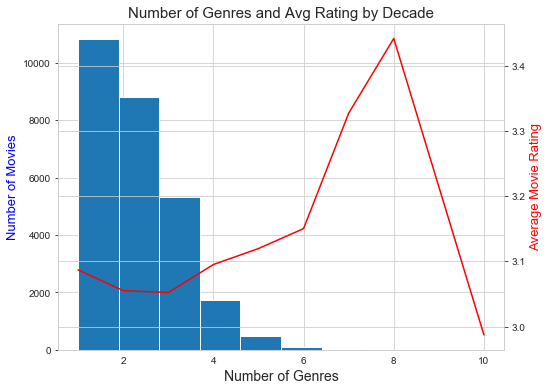

In [28]:
fig, ax1 = plt.subplots(figsize = (8, 6))
ax1.hist(df_n['num_genres'])
ax1.set_xlabel('Number of Genres', fontsize = 14)
ax1.set_ylabel('Number of Movies', color='b', fontsize = 13)

ax2 = ax1.twinx()
ax2.plot(df_n.groupby('num_genres').mean()['avg_rating'], 'r')
ax2.set_ylabel('Average Movie Rating', color='r', fontsize = 13)


ax1.set_title('Number of Genres and Avg Rating by Decade', fontsize = 15);

    I would interpret the complexity of the movie/show based on the number of different genres are in the given movie. The rating does tend to increase with the increase of movie  genres, but the number of movies decreases as well.

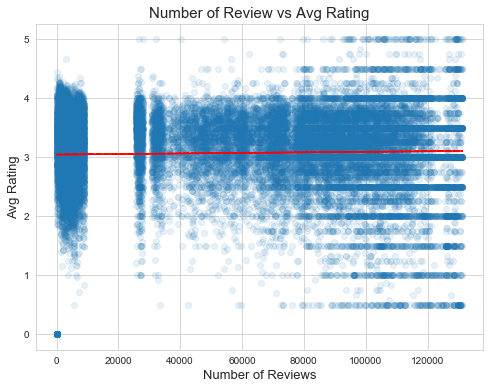

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(x = df_n['num_rating'], y = df_n['avg_rating'], alpha = .1)

z = np.polyfit(df_n['num_rating'], df_n['avg_rating'], 1)
p = np.poly1d(z)
plt.plot(df_n['num_rating'],p(df_n['num_rating']),"r--")
plt.title('Number of Review vs Avg Rating', fontsize = 15);
plt.ylabel('Avg Rating', fontsize = 13)
plt.xlabel('Number of Reviews', fontsize = 13);

#### Genres

In [30]:
df_n.head(2)

,movieId,title,genres,action,adventure,animation,children,comedy,crime,documentary,...,film_noir,romance,scifi,thriller,war,western,decade,num_genres,avg_rating,num_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1990,5,3.921240,1.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1990,3,3.211977,2.0


In [31]:
genres = ['action',
       'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'horror', 'imax', 'musical', 'mystery',
       'no_genres', 'film_noir', 'romance', 'scifi', 'thriller', 'war', 'western']

In [32]:
# Creating a function to take the avg rating for each genre column and converting it to a dataframe
def data_by_genre(df, genres, data_of_interest):
    genre_dict = {}
    for i in genres:
        genre_dict[i] = df[df[i]==1].mean()[data_of_interest]
    return genre_dict

In [33]:
# Using previously created function to calulate the average rating by genre
genre_dict = data_by_genre(df_n, genres, 'avg_rating')
genre_rating = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['avg_rating'])
genre_rating.head(3)

,avg_rating
action,2.931153
adventure,3.017001
animation,3.139972


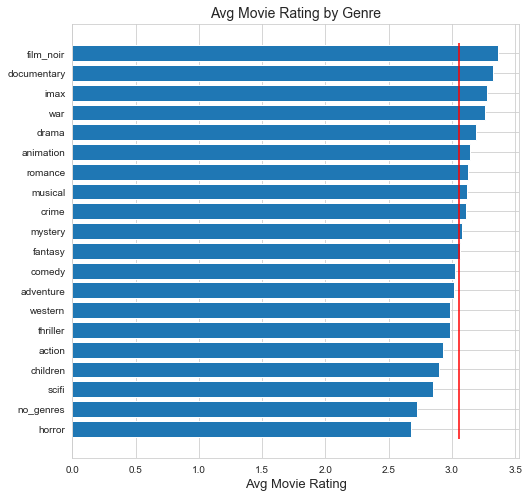

In [34]:
# Visualizing the average movie rating by genre and comparing it with the avg
plt.figure(figsize=(8,8))
plt.barh(genre_rating.sort_values(by = 'avg_rating').index, 
         width=genre_rating.sort_values(by = 'avg_rating')['avg_rating'])
plt.vlines(genre_rating.sort_values(by = 'avg_rating')['avg_rating'].mean(), ymin = -.5, ymax = 19.5, color = 'r')
plt.xlabel('Avg Movie Rating', fontsize = 13)
plt.title('Avg Movie Rating by Genre', fontsize = 14);

In [35]:
# Using previously created function to calulate the average number of genres that overlap with a single genre
genre_dict_count = data_by_genre(df_n, genres, 'num_genres')
genre_count = pd.DataFrame.from_dict(genre_dict_count, orient='index', columns=['num_genres'])
genre_count.head(3)

,num_genres
action,3.074169
adventure,3.299270
animation,3.264849


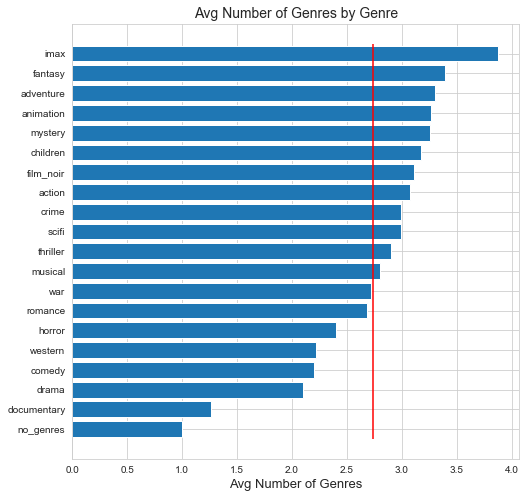

In [36]:
# Visualizing the count of ratings by genre and comparing it with the avg
plt.figure(figsize=(8,8))
plt.barh(genre_count.sort_values(by = 'num_genres').index, 
         width=genre_count.sort_values(by = 'num_genres')['num_genres'])
plt.vlines(genre_count.sort_values(by = 'num_genres')['num_genres'].mean(), ymin = -.5, ymax = 19.5, color = 'r')
plt.xlabel('Avg Number of Genres', fontsize = 13)
plt.title('Avg Number of Genres by Genre', fontsize = 14);

In [37]:
# Combining the genre count and avg_rating to see if rating and complexity have any pattern
genre_count['avg_rating'] = genre_rating['avg_rating']
genre_count.head(2)

,num_genres,avg_rating
action,3.074169,2.931153
adventure,3.299270,3.017001


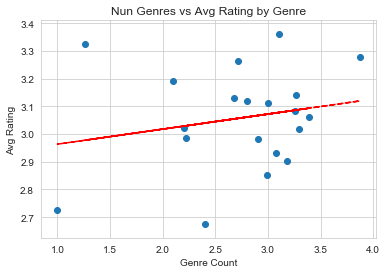

In [38]:
plt.scatter(x = genre_count['num_genres'], y = genre_count['avg_rating'])
z = np.polyfit(genre_count['num_genres'], genre_count['avg_rating'], 1)
p = np.poly1d(z)
plt.plot(genre_count['num_genres'],p(genre_count['num_genres']),"r--")
plt.title('Nun Genres vs Avg Rating by Genre')
plt.ylabel('Avg Rating')
plt.xlabel('Genre Count');

In [39]:
df_n.groupby('decade').sum()[genres].columns

Index(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'horror', 'imax', 'musical',
       'mystery', 'no_genres', 'film_noir', 'romance', 'scifi', 'thriller',
       'war', 'western'],
      dtype='object')

In [40]:
decade_df = df_n.groupby('decade').sum()[genres]
decade_df.head(3)

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,horror,imax,musical,mystery,no_genres,film_noir,romance,scifi,thriller,war,western
decade,,,,,,,,,,,,,,,,,,,,
1890,0,0,0,0,1,0,3,0,2,0,0,1,0,5,0,1,1,0,0,0
1900,1,1,0,0,2,2,2,1,2,0,0,0,0,0,0,1,1,0,0,1
1910,4,8,2,1,41,5,0,46,5,6,0,0,2,2,0,14,3,2,5,5


In [41]:
decade_df['all'] = decade_df.sum(axis = 1)
decade_df.head(3) 

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,horror,...,musical,mystery,no_genres,film_noir,romance,scifi,thriller,war,western,all
decade,,,,,,,,,,,,,,,,,,,,,
1890,0,0,0,0,1,0,3,0,2,0,...,1,0,5,0,1,1,0,0,0,14
1900,1,1,0,0,2,2,2,1,2,0,...,0,0,0,0,1,1,0,0,1,14
1910,4,8,2,1,41,5,0,46,5,6,...,0,2,2,0,14,3,2,5,5,151


In [42]:
# Normalizing the data into percentage
decade_df
for i in decade_df.columns:
    decade_df[i + '_percent'] = (decade_df[i]/decade_df['all'])

In [43]:
decade_df = decade_df.drop(columns='all_percent')

In [54]:
decade_df.head(3)

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,horror,...,imax_percent,musical_percent,mystery_percent,no_genres_percent,film_noir_percent,romance_percent,scifi_percent,thriller_percent,war_percent,western_percent
decade,,,,,,,,,,,,,,,,,,,,,
1890,0,0,0,0,1,0,3,0,2,0,...,0.0,0.071429,0.000000,0.357143,0.0,0.071429,0.071429,0.000000,0.000000,0.000000
1900,1,1,0,0,2,2,2,1,2,0,...,0.0,0.000000,0.000000,0.000000,0.0,0.071429,0.071429,0.000000,0.000000,0.071429
1910,4,8,2,1,41,5,0,46,5,6,...,0.0,0.000000,0.013245,0.013245,0.0,0.092715,0.019868,0.013245,0.033113,0.033113


In [55]:
percent_columns = [i for i in decade_df.columns if 'percent' in i]

Text(0.5, 1.0, 'Percent of Genres by Decade')

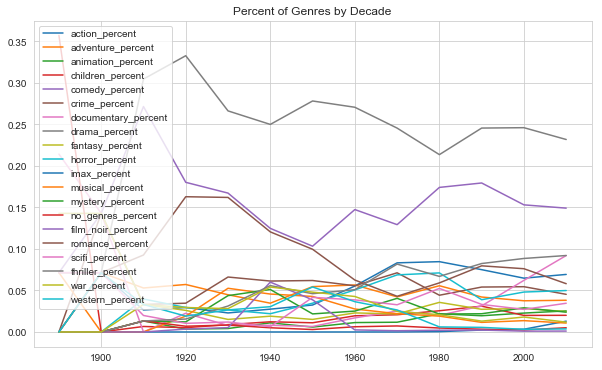

In [56]:
plt.figure(figsize = (10,6))

for i in percent_columns:
    plt.plot(decade_df[i], label = i)
plt.legend()
plt.title('Percent of Genres by Decade')

<BarContainer object of 13 artists>

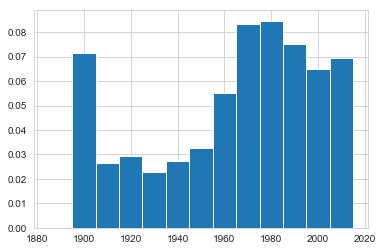

In [57]:
plt.bar(decade_df.index, decade_df['action_percent'],width = 10)

In [58]:
def plotting_genres_by_decade(components, features):
    fig, ax = plt.subplots(nrows=len(features), ncols=1, figsize = (6, len(features)* 6))
    ax = ax.ravel() 
    for i in range(len(features)):
        ax[i].bar(components.index, components[features[i]],width = 10)
        ax[i].set_title(features[i], fontsize = 14)

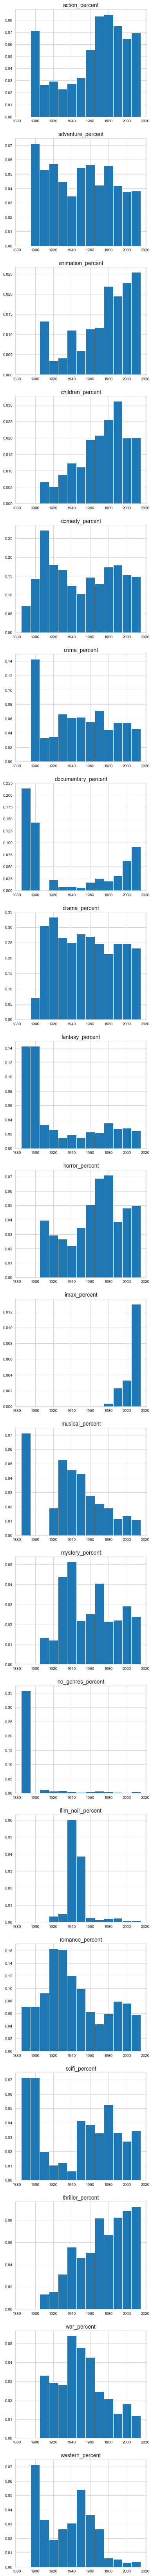

In [59]:
plotting_genres_by_decade(decade_df,percent_columns)

In [60]:
decade_df_t= decade_df.T[decade_df.T[2010]<1.1]

In [61]:
decade_df_t.columns = decade_df_t.columns.astype(str)

In [90]:
def plotting_genres_by_decade_2(components, features):
    fig, ax = plt.subplots(nrows=len(features), ncols=1, figsize = (6, len(features)* 6))
    ax = ax.ravel() 
    for i in range(len(features)):
        ax[i].bar(components.index, components[features[i]])
        ax[i].set_title(features[i], fontsize = 14 )
        ax[i].tick_params(labelrotation=90)
    plt.tight_layout()
    fig.savefig(f'images/{i}')

In [95]:
check = decade_df_t[['1980','2010']]

In [102]:
check['delta'] = check['2010'] - check['1980']

/Users/dmitriy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
check.sort_values(by='delta')

decade,1980,2010,delta
comedy_percent,0.174137,0.149165,-0.024972
horror_percent,0.071142,0.049902,-0.021240
scifi_percent,0.052451,0.034606,-0.017845
adventure_percent,0.055693,0.038186,-0.017507
action_percent,0.084684,0.069321,-0.015363
fantasy_percent,0.035667,0.024517,-0.011149
war_percent,0.020790,0.011825,-0.008965
musical_percent,0.019073,0.010740,-0.008333
children_percent,0.025558,0.020069,-0.005488
western_percent,0.006103,0.003688,-0.002415


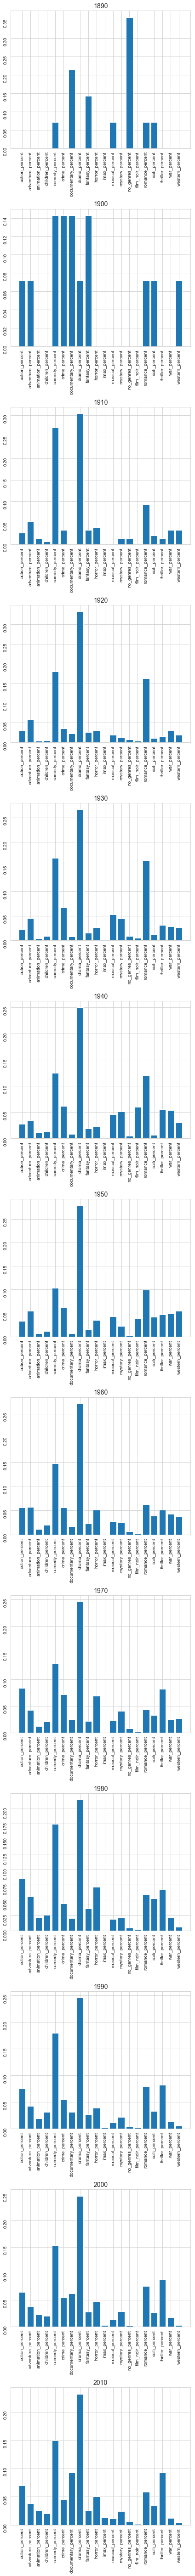

In [91]:
plotting_genres_by_decade_2(decade_df_t, decade_df_t.columns)

In [73]:
df_n.head()

,movieId,title,genres,action,adventure,animation,children,comedy,crime,documentary,...,film_noir,romance,scifi,thriller,war,western,decade,num_genres,avg_rating,num_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1990,5,3.921240,1.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1990,3,3.211977,2.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1990,2,3.151040,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1990,3,2.861393,4.0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1990,1,3.064592,5.0


In [74]:
decades = ['decade_1890', 'decade_1900',
       'decade_1910', 'decade_1920', 'decade_1930', 'decade_1940',
       'decade_1950', 'decade_1960', 'decade_1970', 'decade_1980',
       'decade_1990', 'decade_2000', 'decade_2010']

In [76]:
df_final = df_n
df_final[decades] = df_eda[decades]
df_final.head(3)

,movieId,title,genres,action,adventure,animation,children,comedy,crime,documentary,...,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
df_final.columns

Index(['movieId', 'title', 'genres', 'action', 'adventure', 'animation',
       'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
       'horror', 'imax', 'musical', 'mystery', 'no_genres', 'film_noir',
       'romance', 'scifi', 'thriller', 'war', 'western', 'decade',
       'num_genres', 'avg_rating', 'num_rating', 'decade_1890', 'decade_1900',
       'decade_1910', 'decade_1920', 'decade_1930', 'decade_1940',
       'decade_1950', 'decade_1960', 'decade_1970', 'decade_1980',
       'decade_1990', 'decade_2000', 'decade_2010'],
      dtype='object')

In [79]:
df_final = df_final.drop(columns = 'decade', axis = 1)

In [80]:
df_final.to_csv('data/movie_to_recommender.csv', index = False)